# PREDIKSI PENJUALAN TOTAL KUANTITAS 

## IMPORT LIBRARY

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

customer_df = pd.read_csv('D:/DATA SCIENCE/RAKAMIN - DS/VIX Final Project/Case Study Data Scientist/Customer.csv', sep=';')
product_df = pd.read_csv('D:/DATA SCIENCE/RAKAMIN - DS/VIX Final Project/Case Study Data Scientist/Product.csv', sep=';')
store_df = pd.read_csv('D:/DATA SCIENCE/RAKAMIN - DS/VIX Final Project/Case Study Data Scientist/Store.csv', sep=';')
transaction_df = pd.read_csv('D:/DATA SCIENCE/RAKAMIN - DS/VIX Final Project/Case Study Data Scientist/Transaction.csv', sep=';')

merged_df = pd.merge(transaction_df, customer_df, on='CustomerID', how='inner')
merged_df = pd.merge(merged_df, store_df, on='StoreID', how='inner')
df = pd.merge(merged_df, product_df, on='ProductID', how='inner')


## DATA PROFILING

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   TransactionID   5020 non-null   object
 1   CustomerID      5020 non-null   int64 
 2   Date            5020 non-null   object
 3   ProductID       5020 non-null   object
 4   Price_x         5020 non-null   int64 
 5   Qty             5020 non-null   int64 
 6   TotalAmount     5020 non-null   int64 
 7   StoreID         5020 non-null   int64 
 8   Age             5020 non-null   int64 
 9   Gender          5020 non-null   int64 
 10  Marital Status  4976 non-null   object
 11  Income          5020 non-null   object
 12  StoreName       5020 non-null   object
 13  GroupStore      5020 non-null   object
 14  Type            5020 non-null   object
 15  Latitude        5020 non-null   object
 16  Longitude       5020 non-null   object
 17  Product Name    5020 non-null   object
 18  Price_y 

In [4]:
df.head()

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,StoreName,GroupStore,Type,Latitude,Longitude,Product Name,Price_y
0,TR11369,328,01/01/2022,P3,7500,4,30000,12,36,0,Married,"10,53",Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",Crackers,7500
1,TR89318,183,17/07/2022,P3,7500,1,7500,12,27,1,Single,"0,18",Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",Crackers,7500
2,TR9106,123,26/09/2022,P3,7500,4,30000,12,34,0,Married,"4,36",Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",Crackers,7500
3,TR4331,335,08/01/2022,P3,7500,3,22500,12,29,1,Single,"4,74",Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",Crackers,7500
4,TR6445,181,10/01/2022,P3,7500,4,30000,12,33,1,Married,"9,94",Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",Crackers,7500


## DATA CLEANSING

### DATA IMPUTATION

In [5]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4976 entries, 0 to 5019
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   TransactionID   4976 non-null   object
 1   CustomerID      4976 non-null   int64 
 2   Date            4976 non-null   object
 3   ProductID       4976 non-null   object
 4   Price_x         4976 non-null   int64 
 5   Qty             4976 non-null   int64 
 6   TotalAmount     4976 non-null   int64 
 7   StoreID         4976 non-null   int64 
 8   Age             4976 non-null   int64 
 9   Gender          4976 non-null   int64 
 10  Marital Status  4976 non-null   object
 11  Income          4976 non-null   object
 12  StoreName       4976 non-null   object
 13  GroupStore      4976 non-null   object
 14  Type            4976 non-null   object
 15  Latitude        4976 non-null   object
 16  Longitude       4976 non-null   object
 17  Product Name    4976 non-null   object
 18  Price_y 

### DATA TRANSFORMATION

In [6]:
df['Date'] = df['Date'].astype('datetime64[ns]')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4976 entries, 0 to 5019
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   TransactionID   4976 non-null   object        
 1   CustomerID      4976 non-null   int64         
 2   Date            4976 non-null   datetime64[ns]
 3   ProductID       4976 non-null   object        
 4   Price_x         4976 non-null   int64         
 5   Qty             4976 non-null   int64         
 6   TotalAmount     4976 non-null   int64         
 7   StoreID         4976 non-null   int64         
 8   Age             4976 non-null   int64         
 9   Gender          4976 non-null   int64         
 10  Marital Status  4976 non-null   object        
 11  Income          4976 non-null   object        
 12  StoreName       4976 non-null   object        
 13  GroupStore      4976 non-null   object        
 14  Type            4976 non-null   object        
 15  Lati

C:\Users\meidi\AppData\Local\Temp\ipykernel_17252\2177442927.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = df['Date'].astype('datetime64[ns]')


### CHECK DATA DUPLICATION

In [7]:
df.duplicated().sum()

0

## Analisis Regression

### Pengelompokkan Data yang digunakan untuk Prediksi

In [8]:
reg_df = df.groupby('Date').agg({'Qty' : 'sum'}).reset_index()
reg_df
reg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    365 non-null    datetime64[ns]
 1   Qty     365 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB


### Splitting Data (Train, Test)

In [9]:
day_desember = 31
split = reg_df.shape[0] - day_desember
df_train = reg_df[:split]
df_test = reg_df[split:]

df_train.shape, df_test.shape


((334, 2), (31, 2))

<Axes: xlabel='Date', ylabel='Qty'>

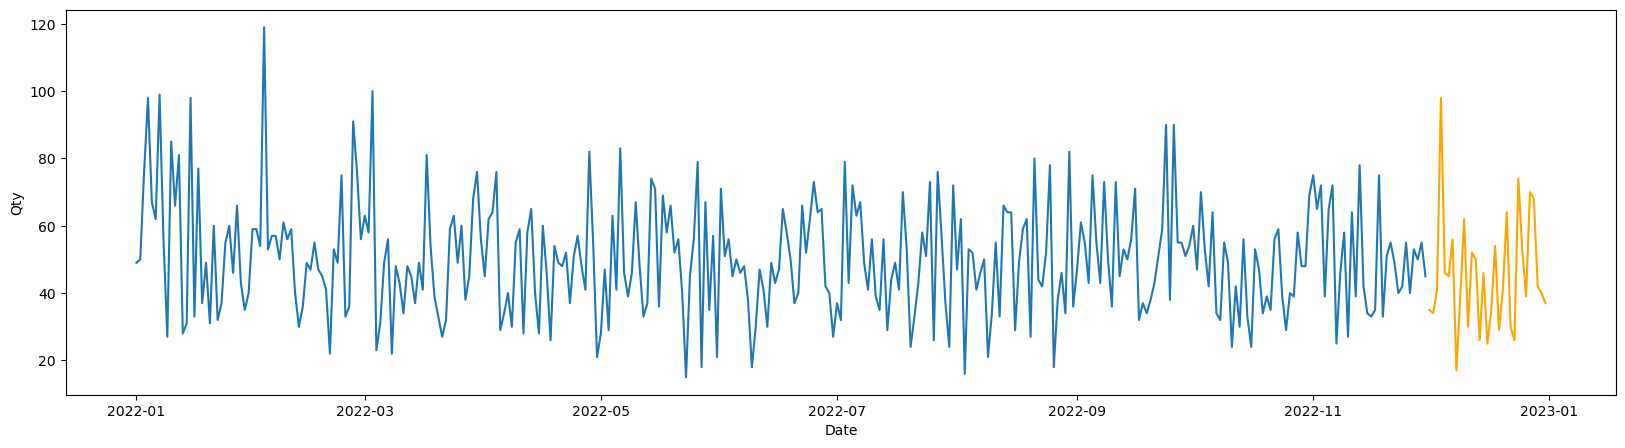

In [10]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df_train, x=df_train['Date'], y=df_train['Qty'])
sns.lineplot(data=df_test, x=df_test['Date'], y=df_test['Qty'], color='orange')


### IMPORT LIBRARY ARIMA

In [11]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels as sm
import warnings

### UJI STASIONER

In [12]:
from statsmodels.tsa.stattools import adfuller

def uji_stat(timeseries):
    result = adfuller(timeseries)
    p_value = result[1]
    print("P-Value:", p_value)
    if p_value <= 0.05:
        print("Time Series is Stationary")
    else:
        print("Time Series is Non-Stationary")

df_train_stat = df_train['Qty'].values
uji_stat(df_train_stat)
        

P-Value: 2.3371226034904397e-30
Time Series is Stationary


### Menemukan Nilai p,d,q

<Figure size 640x480 with 0 Axes>

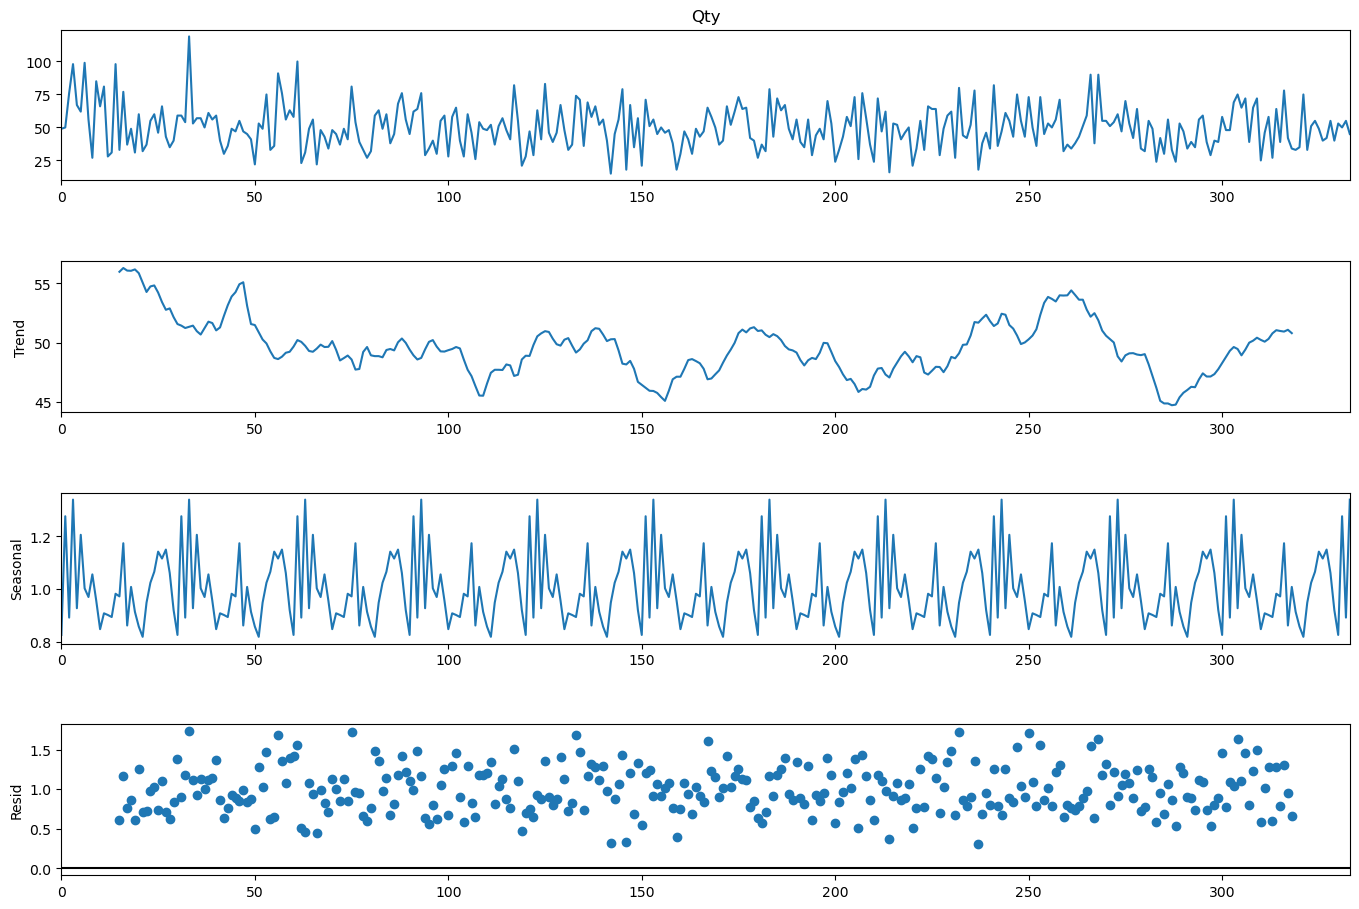

In [13]:
result = seasonal_decompose(df_train['Qty'], model='multiplicative', period=30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15,10)

### Menggunakan Auto Arima untuk mencari nilai terbaik p, d, q

In [14]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [15]:
model_fit = auto_arima(df_train['Qty'], trace=True, suppress_warnings=True)

model_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2834.409, Time=0.34 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2829.549, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2831.545, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2831.545, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3598.863, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2833.548, Time=0.11 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.574 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  334
Model:                        SARIMAX   Log Likelihood               -1412.774
Date:                Sun, 30 Jul 2023   AIC                           2829.549
Time:                        21:18:37   BIC                           2837.171
Sample:                             0   HQIC                          2832.588
                                - 334                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     50.0629      0.977     51.257      0.000      48.149      51.977
sigma2       276.4002     19.988     13.828      0.000     237.224     315.577
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                25.17
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.67   Skew:                             0.59
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Best ARIMA Model -> ARIMA(0, 0, 0)

### Memasukkan nilai p,d,q yang di dapatkan

Mean Absolute Percentage Error (MAPE): 39.79%


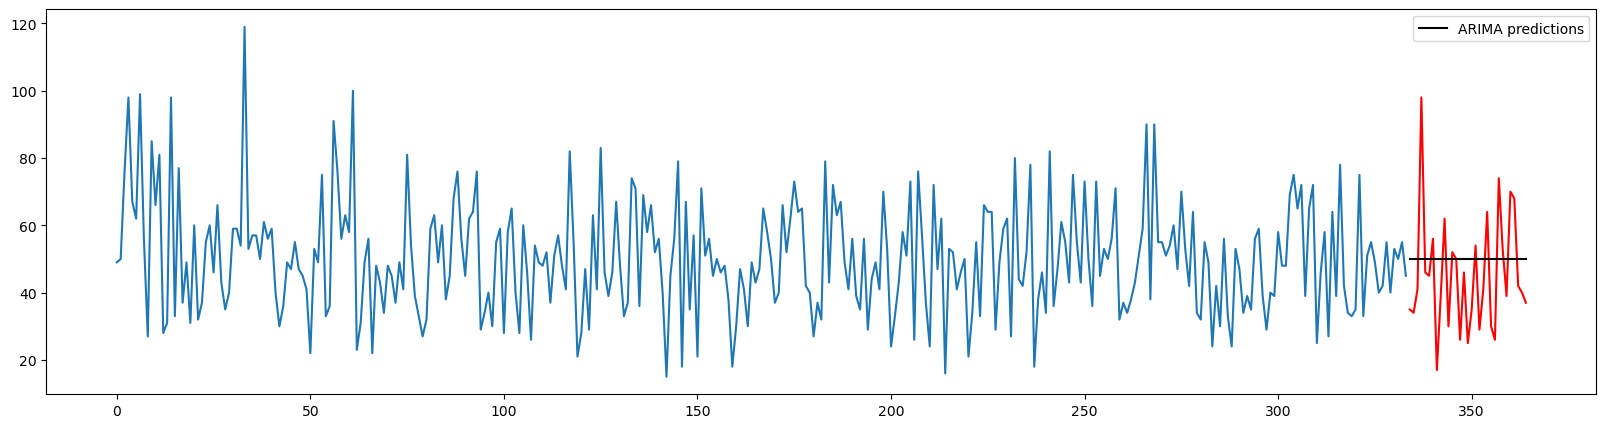

In [16]:
# ARIMA
from statsmodels.tsa.arima.model import ARIMA


y = df_train['Qty']

# Bangun model ARIMA
ARIMAmodel = ARIMA(y, order=(0, 0, 0))
ARIMAmodel = ARIMAmodel.fit()

# Lakukan prediksi untuk data uji
pred_y = ARIMAmodel.get_forecast(steps=len(df_test))
pred_y_df = pred_y.conf_int()
pred_y_df['predictions'] = ARIMAmodel.predict(start=pred_y_df.index[0], end=pred_y_df.index[-1])
pred_y_df.index = df_test.index
pred_y_out = pred_y_df['predictions']

# Evaluasi performa model ARIMA dengan data uji
def eval(actual, predicted):
    # Menghitung Mean Absolute Percentage Error (MAPE)
    absolute_percentage_errors = abs((actual - predicted) / actual)
    mean_absolute_percentage_error = absolute_percentage_errors.mean() * 100
    print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mean_absolute_percentage_error))
    return mean_absolute_percentage_error

# Evaluasi performa model ARIMA
mape = eval(df_test['Qty'], pred_y_out)

# Plot hasil prediksi dan data asli
plt.figure(figsize=(20, 5))
plt.plot(df_train['Qty'])
plt.plot(df_test['Qty'], color='red')
plt.plot(pred_y_out, color='black', label='ARIMA predictions')
plt.legend()
plt.show()


In [17]:
start = len(df_train)
end = len(df_train) + len(df_test) - 1
pred = ARIMAmodel.predict(start=start, end=end,type='levels')
pred.index = df.index[start:end+1]
print(pred)

337    50.062869
338    50.062869
339    50.062869
340    50.062869
341    50.062869
342    50.062869
343    50.062869
344    50.062869
345    50.062869
347    50.062869
348    50.062869
349    50.062869
350    50.062869
351    50.062869
352    50.062869
353    50.062869
354    50.062869
355    50.062869
356    50.062869
357    50.062869
358    50.062869
359    50.062869
360    50.062869
361    50.062869
362    50.062869
363    50.062869
364    50.062869
365    50.062869
366    50.062869
367    50.062869
368    50.062869
Name: predicted_mean, dtype: float64


<Axes: >

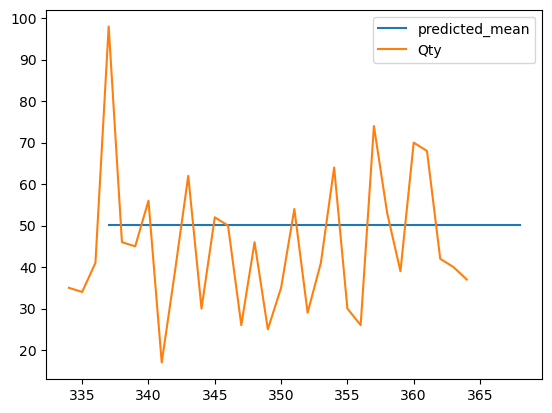

In [18]:
pred.plot(legend=True)
df_test['Qty'].plot(legend=True)

### Kesimpulan 

Berdasarkan pernyataan di atas, kita dapat membuat beberapa interpretasi dan kesimpulan terkait dengan penggunaan ARIMA model untuk memprediksi jumlah produk yang terjual dan mengatur stok persediaan harian:

- Berdasarkan pengujian data train dan data test, model ARIMA telah menghasilkan prediksi rata-rata sebanyak 50 produk untuk stok persediaan setiap harinya. 
- Dihasilkan juga nilai MAPE sebesar 39.79% , yang berarti kurang lebih tingkat akurasi hasil prediksi tersebut sebesar 60%. Semakin rendah nilai MAPE, semakin akurat prediksi model. 

Dengan MAPE yang relatif rendah, model ini menunjukkan potensi yang baik untuk mendukung tim inventory dalam mengoptimalkan stok dan permintaan produk Kalbe Nutritionals. Namun, tetap perlu dilakukan pemantauan dan evaluasi secara berkala untuk memastikan kualitas prediksi tetap optimal dan responsif terhadap perubahan kondisi pasar.


## Clustering 

### IMPORT LIBRARY CLUSTERING

In [19]:
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn import preprocessing

In [20]:
df.head()

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,StoreName,GroupStore,Type,Latitude,Longitude,Product Name,Price_y
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,"10,53",Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",Crackers,7500
1,TR89318,183,2022-07-17,P3,7500,1,7500,12,27,1,Single,"0,18",Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",Crackers,7500
2,TR9106,123,2022-09-26,P3,7500,4,30000,12,34,0,Married,"4,36",Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",Crackers,7500
3,TR4331,335,2022-08-01,P3,7500,3,22500,12,29,1,Single,"4,74",Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",Crackers,7500
4,TR6445,181,2022-10-01,P3,7500,4,30000,12,33,1,Married,"9,94",Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",Crackers,7500


In [21]:
cluster_df = df.groupby(['CustomerID']).agg({
    'TransactionID' : 'count',
    'Qty' : 'sum',
    'TotalAmount' : 'sum'
}).reset_index()

In [22]:
cluster_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   CustomerID     444 non-null    int64
 1   TransactionID  444 non-null    int64
 2   Qty            444 non-null    int64
 3   TotalAmount    444 non-null    int64
dtypes: int64(4)
memory usage: 14.0 KB


### Normalisasi Data

In [23]:
cluster_data = cluster_df.drop(columns=['CustomerID'])

cluster_df_normalize = preprocessing.normalize(cluster_data)

In [24]:
print(cluster_df_normalize)

[[2.72741856e-05 9.62618317e-05 9.99999995e-01]
 [3.31379043e-05 1.45296965e-04 9.99999989e-01]
 [3.36172117e-05 1.25504257e-04 9.99999992e-01]
 ...
 [3.06539507e-05 1.15803814e-04 9.99999993e-01]
 [2.59862980e-05 9.92204105e-05 9.99999995e-01]
 [2.95925334e-05 9.56066465e-05 9.99999995e-01]]


### KMeans Clustering

In [25]:
K = range(2,8)
fits = []
score = []

for k in K:
    model = KMeans(n_clusters = k, random_state=0, n_init='auto').fit(cluster_df_normalize)
    
    fits.append(model)
    
    score.append(silhouette_score(cluster_df_normalize, model.labels_, metric='euclidean'))
    


### Elbow Method untuk menentukan jumlah Clustering

<Axes: >

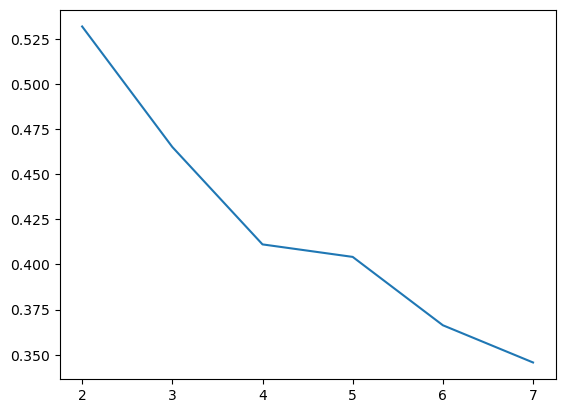

In [26]:
sns.lineplot(x=K, y=score)

Metode elbow digunakan untuk menentukan jumlah cluster yang terbaik yang dapat digunakan untuk menghasilkan hasil cluster yang terbaik dan dapat memaksimalkan kualitas hasil cluster

Pada grafik, terlihat berbentuk siku pada k = 4, maka clustering terbaik dibagi menjadi 4 label

### Pengelompokan Data (Clustering)

In [27]:
cluster_df['cluster_label'] = fits[2].labels_


In [28]:
cluster_df.groupby(['cluster_label']).agg({
    'CustomerID': 'count',
    'TransactionID': 'mean',
    'Qty': 'mean',
    'TotalAmount': 'mean',
})

,CustomerID,TransactionID,Qty,TotalAmount
cluster_label,,,,
0,157,11.675159,42.764331,387594.267516
1,33,9.696970,36.818182,239572.727273
2,117,11.495726,39.452991,416039.316239
3,137,10.788321,40.729927,314845.985401


### Kesimpulan

Berdasarkan hasil clustering menggunakan algoritma KMeans dengan 4 cluster pada data pelanggan Kalbe Nutritionals, dapat diidentifikasi empat kelompok pelanggan yang berbeda berdasarkan karakteristik pembelian mereka :

-------------------------------------------------------------------------------------------------------------------------------------------------

Cluster 0 - (High-Volume Buyers):

- Jumlah Pelanggan: 157
- Rata-rata Jumlah Transaksi (TransactionID): 12
- Rata-rata Jumlah Barang Terjual (Qty): 43
- Rata-rata Pendapatan (TotalAmount): Rp387,594,000

High-Value Buyers adalah kelompok pelanggan yang melakukan pembelian dengan frekuensi tinggi. Dalam rata-rata, setiap pelanggan melakukan 12 transaksi, dan membeli rata-rata 43 barang dalam satu transaksi. Dengan rata-rata pendapatan sebesar Rp387,594,000, cluster ini menyumbang kontribusi yang signifikan terhadap pendapatan perusahaan. Pelanggan dalam kelompok ini mungkin merupakan pelanggan setia yang sering berbelanja produk Kalbe Nutritionals dan cenderung membeli dalam jumlah yang relatif besar setiap kali bertransaksi.

-------------------------------------------------------------------------------------------------------------------------------------------------

Cluster 1 - (Moderate Buyers):

- Jumlah Pelanggan: 33
- Rata-rata Jumlah Transaksi (TransactionID): 10
- Rata-rata Jumlah Barang Terjual (Qty): 37
- Rata-rata Pendapatan (TotalAmount): Rp239,573,000

Moderate Buyers adalah kelompok pelanggan dengan jumlah transaksi dan jumlah barang terjual sedang. Dalam rata-rata, setiap pelanggan melakukan 10 transaksi, dan membeli rata-rata 37 barang dalam satu transaksi. Meskipun jumlah pelanggan dalam kelompok ini lebih sedikit, mereka masih memberikan kontribusi yang signifikan terhadap pendapatan perusahaan, mencapai Rp239,573,000. Pelanggan dalam kelompok ini cenderung berbelanja secara teratur namun dalam jumlah yang sedang.

-------------------------------------------------------------------------------------------------------------------------------------------------

Cluster 2 - (High-Value Buyers):

- Jumlah Pelanggan: 117
- Rata-rata Jumlah Transaksi (TransactionID): 11
- Rata-rata Jumlah Barang Terjual (Qty): 39
- Rata-rata Pendapatan (TotalAmount): Rp416,039,000

High-Value Buyers adalah kelompok pelanggan dengan nilai transaksi tertinggi. Dalam rata-rata, setiap pelanggan melakukan 11 transaksi, dan membeli rata-rata 39 barang dalam satu transaksi. Rata-rata pendapatan dari kelompok pelanggan ini mencapai Rp416,039,000, yang menjadikannya kontributor utama dalam menghasilkan pendapatan bagi perusahaan. Pelanggan dalam kelompok ini cenderung berbelanja dalam jumlah besar dan memilih produk-produk dengan nilai lebih tinggi.

-------------------------------------------------------------------------------------------------------------------------------------------------

Cluster 3 - (Mid-Range Buyers ):

- Jumlah Pelanggan: 137
- Rata-rata Jumlah Transaksi (TransactionID): 11
- Rata-rata Jumlah Barang Terjual (Qty): 41
- Rata-rata Pendapatan (TotalAmount): Rp314,846,000

Mid-Range Buyers adalah kelompok pelanggan dengan jumlah transaksi dan jumlah barang terjual yang berada di antara Cluster 1 dan Cluster 2. Dalam rata-rata, setiap pelanggan melakukan 11 transaksi, dan membeli rata-rata 41 barang dalam satu transaksi. Kelompok pelanggan ini memiliki kontribusi pendapatan yang cukup besar, mencapai Rp314,846,000. Pelanggan dalam kelompok ini dapat menjadi target analisis lebih lanjut untuk memahami preferensi mereka dan mengembangkan promosi yang lebih personal.


